Loading Cleaned Data and Importing:

In [412]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

# Load the Excel file into a DataFrame
data = pd.read_excel("Cleaned_Survey_ICS487_Project.xlsx")

Encoding the target variable(budget rule) and Scaling numerical features

In [413]:
# Encode the target variable
label_encoder = LabelEncoder()
data['budgeting_rule'] = label_encoder.fit_transform(data['budgeting_rule'])

# # Scale numerical features for better performance
# scaler = StandardScaler()
# numerical_columns = ['salary_(sar)', 'monthly_debt_(sar)', 'elementary_expenses_(sar)', 
#                      'debt_to_income_ratio', 'savings_ratio']
# data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

Model Training:

In [ ]:
# Define features (X) and target (y)
X = data.drop(['budgeting_rule'], axis=1)  # Features
y = data['budgeting_rule']  # Target

# Train a Random Forest model using OOB evaluation
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    oob_score=True,
    random_state=42
)
rf_model.fit(X, y)

# Get the OOB score
oob_score = rf_model.oob_score_
print(f"OOB Score: {oob_score:.4f}")
# Evaluate the model on training data
y_pred = rf_model.predict(X)
# Accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy on Training Data: {accuracy:.4f}")

OOB Score: 0.8934
Accuracy on Training Data: 0.9631

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       390
           1       0.84      0.88      0.86        42
           2       0.91      0.89      0.90        56

    accuracy                           0.96       488
   macro avg       0.91      0.92      0.91       488
weighted avg       0.96      0.96      0.96       488


Confusion Matrix:
 [[383   4   3]
 [  3  37   2]
 [  3   3  50]]

Feature Importances:
                          Feature  Importance
11                 savings_ratio    0.463016
2      elementary_expenses_(sar)    0.175237
0                   salary_(sar)    0.146673
1             monthly_debt_(sar)    0.055770
10          debt_to_income_ratio    0.042970
4                   state_Single    0.034072
6                   goal_Savings    0.022079
3             number_of_children    0.018877
8   employment_status_Unemployed    0.016751
9  

Feature Importance: Random Forest provides feature importance scores

Feature Importances:
                         Feature  Importance
11                 savings_ratio    0.463016
2      elementary_expenses_(sar)    0.175237
0                   salary_(sar)    0.146673
1             monthly_debt_(sar)    0.055770
10          debt_to_income_ratio    0.042970
4                   state_Single    0.034072
6                   goal_Savings    0.022079
3             number_of_children    0.018877
8   employment_status_Unemployed    0.016751
9              age_group_encoded    0.011730
7      employment_status_Student    0.008815
5                       sex_Male    0.004011


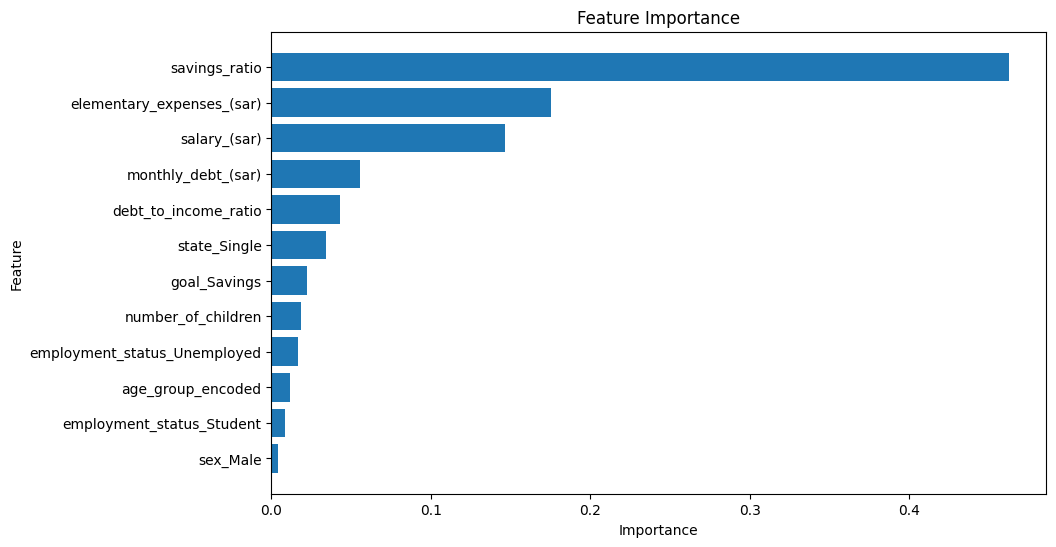

In [415]:
# Feature importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

Cross-Validation:

In [416]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")

Cross-Validation Accuracy: 0.89


Saving the model:

In [417]:
import joblib

# Save the trained random forest model
joblib.dump(rf_model, 'salary_allocation_model.pkl')

['salary_allocation_model.pkl']

In [418]:
data.columns

Index(['salary_(sar)', 'monthly_debt_(sar)', 'elementary_expenses_(sar)',
       'number_of_children', 'budgeting_rule', 'state_Single', 'sex_Male',
       'goal_Savings', 'employment_status_Student',
       'employment_status_Unemployed', 'age_group_encoded',
       'debt_to_income_ratio', 'savings_ratio'],
      dtype='object')

In [419]:
data.head()

,salary_(sar),monthly_debt_(sar),elementary_expenses_(sar),number_of_children,budgeting_rule,state_Single,sex_Male,goal_Savings,employment_status_Student,employment_status_Unemployed,age_group_encoded,debt_to_income_ratio,savings_ratio
0,16409,501.91,829.22,0,2,True,False,False,False,False,3,0.030587,0.050534
1,2980,457.79,8852.17,2,0,False,False,False,True,False,0,0.153621,2.970527
2,1679,296.33,12087.75,1,0,False,False,True,False,True,4,0.176492,7.199375
3,2501,104.38,6806.93,3,0,False,True,False,False,True,1,0.041735,2.721683
4,1949,540.36,8537.33,2,0,False,True,True,True,False,1,0.277250,4.380364
